In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
missing_values = ["n/a", "na", "--", "?"]
cancer_df = pd.read_csv('cancer.data', na_values = missing_values)

cancer_df



1000025  5   1  1.1  1.2  2   1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10.0   3    2    1    2
1    1015425  3   1    1    1  2   2.0   3    1    1    2
2    1016277  6   8    8    1  3   4.0   3    7    1    2
3    1017023  4   1    1    3  2   1.0   3    1    1    2
4    1017122  8  10   10    8  7  10.0   9    7    1    4
..       ... ..  ..  ...  ... ..   ...  ..  ...  ...  ...
693   776715  3   1    1    1  3   2.0   1    1    1    2
694   841769  2   1    1    1  2   1.0   1    1    1    2
695   888820  5  10   10    3  7   3.0   8   10    2    4
696   897471  4   8    6    4  3   4.0  10    6    1    4
697   897471  4   8    8    5  4   5.0  10    4    1    4

[698 rows x 11 columns]

In [3]:
cancer_df.columns = ['Sample code number', 'Clump Thickness ', 'Uniformity of Cell Size ', 'Uniformity of Cell Shape', 
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
              'Normal Nucleoli ','Mitoses', 'Class']
cancer_df


Sample code number  Clump Thickness   Uniformity of Cell Size   \
0               1002945                 5                         4   
1               1015425                 3                         1   
2               1016277                 6                         8   
3               1017023                 4                         1   
4               1017122                 8                        10   
..                  ...               ...                       ...   
693              776715                 3                         1   
694              841769                 2                         1   
695              888820                 5                        10   
696              897471                 4                         8   
697              897471                 4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                           8                  1                            3   
3                           1                  3                            2   
4                          10                  8                            7   
..                        ...                ...                          ...   
693                         1                  1                            3   
694                         1                  1                            2   
695                        10                  3                            7   
696                         6                  4                            3   
697                         8                  5                            4   

     Bare Nuclei  Bland Chromatin  Normal Nucleoli   Mitoses  Class  
0           10.0                3                 2        1      2  
1            2.0                3                 1        1      2  
2            4.0                3                 7        1      2  
3            1.0                3                 1        1      2  
4           10.0                9                 7        1      4  
..           ...              ...               ...      ...    ...  
693          2.0                1                 1        1      2  
694          1.0                1                 1        1      2  
695          3.0                8                10        2      4  
696          4.0               10                 6        1      4  
697          5.0               10                 4        1      4  

[698 rows x 11 columns]

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           698 non-null    int64  
 1   Clump Thickness              698 non-null    int64  
 2   Uniformity of Cell Size      698 non-null    int64  
 3   Uniformity of Cell Shape     698 non-null    int64  
 4   Marginal Adhesion            698 non-null    int64  
 5   Single Epithelial Cell Size  698 non-null    int64  
 6   Bare Nuclei                  682 non-null    float64
 7   Bland Chromatin              698 non-null    int64  
 8   Normal Nucleoli              698 non-null    int64  
 9   Mitoses                      698 non-null    int64  
 10  Class                        698 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


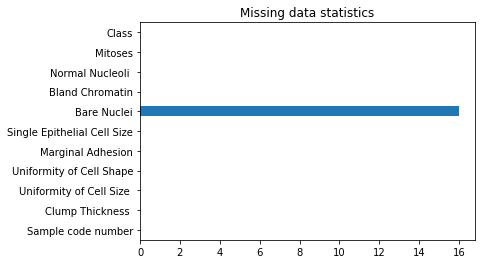

In [5]:
c = cancer_df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='barh')
print(c)

from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(x)
x =imputer.transform(x)

In [6]:
cancer_df = cancer_df.dropna() 

Count of Benign patients 443
Count of Malignant patients 239


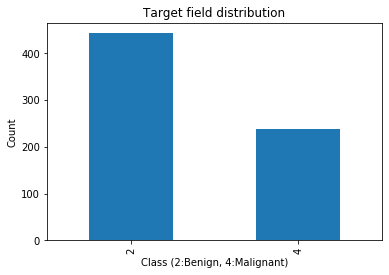

In [7]:
benign, malignant = cancer_df['Class'].value_counts()
print('Count of Benign patients', benign)
print('Count of Malignant patients', malignant)
cancer_df['Class'].value_counts().plot(kind='bar', title='Target field distribution')

plt.ylabel('Count')
plt.xlabel('Class (2:Benign, 4:Malignant)')
plt.show()


In [8]:
replace = {"Class":     {2: 1, 4: 0}}
cancer_df = cancer_df.replace(replace)
cancer_df.head()

Sample code number  Clump Thickness   Uniformity of Cell Size   \
0             1002945                 5                         4   
1             1015425                 3                         1   
2             1016277                 6                         8   
3             1017023                 4                         1   
4             1017122                 8                        10   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4                  5                            7   
1                         1                  1                            2   
2                         8                  1                            3   
3                         1                  3                            2   
4                        10                  8                            7   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli   Mitoses  Class  
0         10.0                3                 2        1      1  
1          2.0                3                 1        1      1  
2          4.0                3                 7        1      1  
3          1.0                3                 1        1      1  
4         10.0                9                 7        1      0

Count of positive records 443
Count of negative records 239


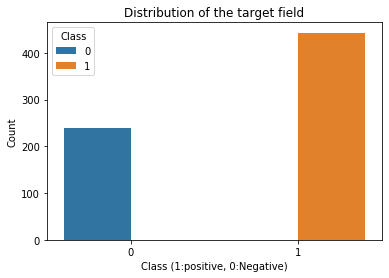

In [9]:
benign, malignant = cancer_df['Class'].value_counts()
print('Count of positive records', benign)
print('Count of negative records', malignant)
sns.countplot(x="Class", hue="Class", data=cancer_df)
plt.ylabel('Count')
plt.xlabel('Class (1:positive, 0:Negative)')
plt.title('Distribution of the target field')
plt.show()

In [10]:
x= cancer_df.drop(['Class'], axis=1)
x
y = cancer_df['Class']
print(x)


     Sample code number  Clump Thickness   Uniformity of Cell Size   \
0               1002945                 5                         4   
1               1015425                 3                         1   
2               1016277                 6                         8   
3               1017023                 4                         1   
4               1017122                 8                        10   
..                  ...               ...                       ...   
693              776715                 3                         1   
694              841769                 2                         1   
695              888820                 5                        10   
696              897471                 4                         8   
697              897471                 4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                  

Text(0, 0.5, 'Density')

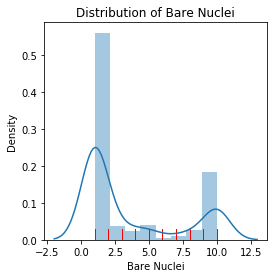

In [11]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Bare Nuclei')
sns.distplot(cancer_df['Bare Nuclei'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

Text(0, 0.5, 'Density')

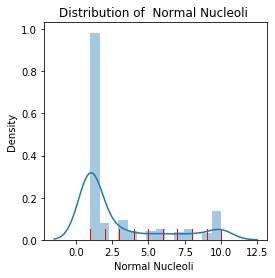

In [12]:
plt.figure(figsize=(4,4))
plt.title('Distribution of  Normal Nucleoli ')
sns.distplot(cancer_df['Normal Nucleoli '], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

Text(0, 0.5, 'Density')

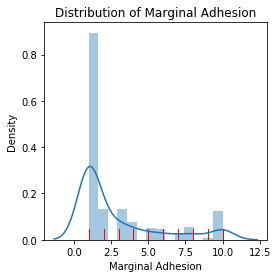

In [13]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Marginal Adhesion')
sns.distplot(cancer_df['Marginal Adhesion'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Box-plot for Wisconsin Breast Cancer')

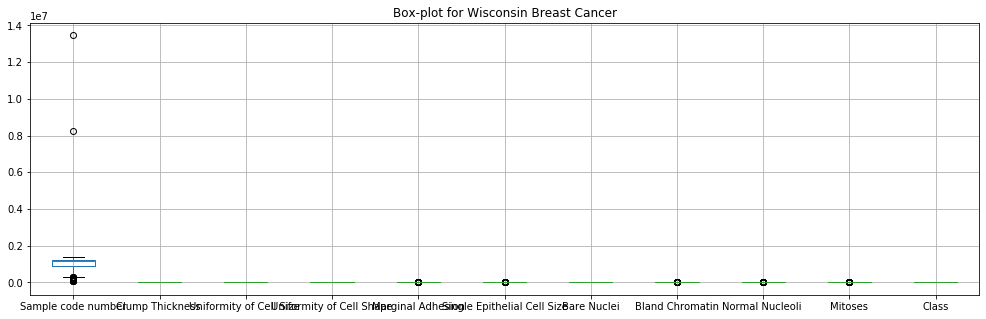

In [26]:
plt.figure(figsize=(17, 5))
print (cancer_df.boxplot() )
plt.title('Box-plot for Wisconsin Breast Cancer')

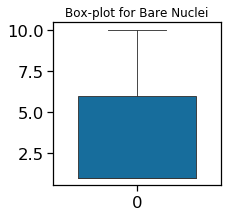

In [43]:
plt.figure(figsize=(3, 3))
plt.title('Box-plot for Bare Nuclei',fontsize=12)
bplot = sns.boxplot(data=cancer_df['Bare Nuclei'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)

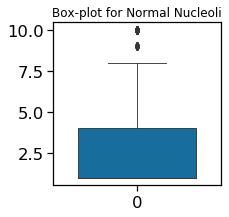

In [44]:
plt.figure(figsize=(3, 3))
plt.title('Box-plot for Normal Nucleoli',fontsize=12)
bplot = sns.boxplot(data=cancer_df['Normal Nucleoli '],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)

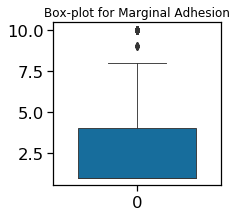

In [45]:
plt.figure(figsize=(3, 3))
plt.title('Box-plot for Marginal Adhesion', fontsize=12)
bplot = sns.boxplot(data=cancer_df['Marginal Adhesion'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)

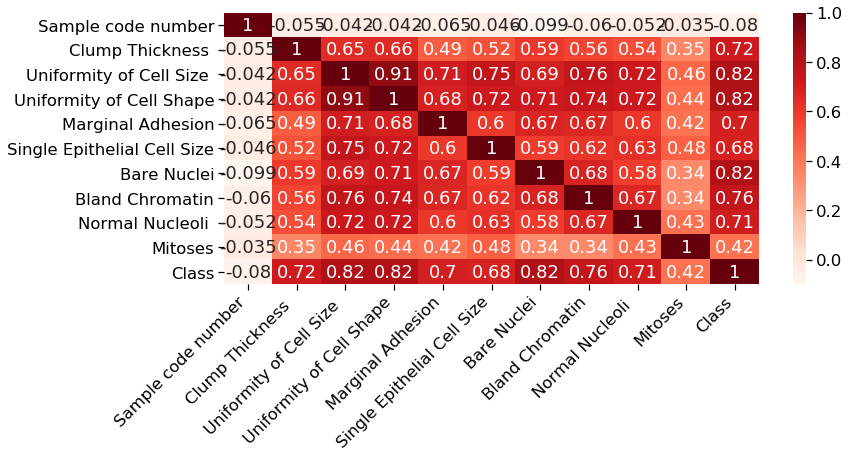

In [49]:
plt.figure(figsize=(12,5))
cor = cancer_df.corr(method='pearson')
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

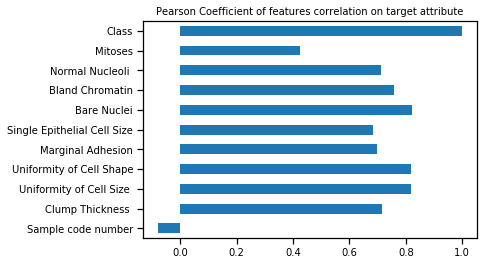

In [63]:
cor_target = (cor["Class"])
plt.title("Pearson Coefficient of features correlation on target attribute", fontsize=10)
cor_target.plot(kind='barh',fontsize=10)

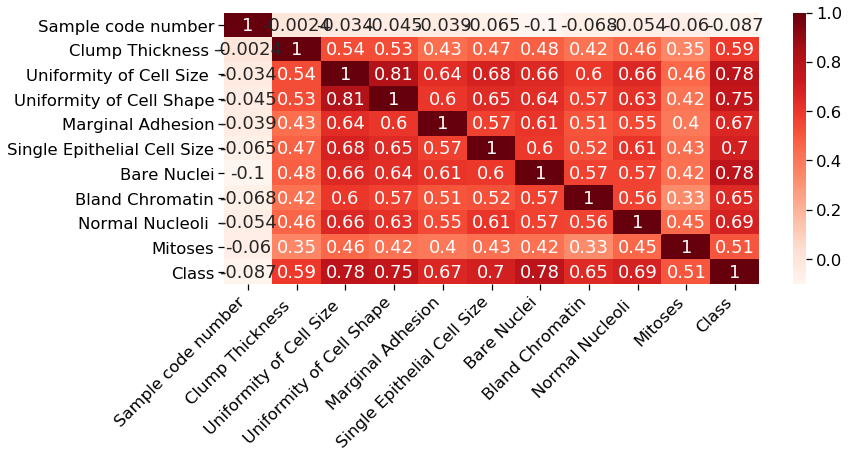

In [59]:
plt.figure(figsize=(12,5))
kendall_corr = cancer_df.corr(method='kendall')
ax = sns.heatmap(kendall_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

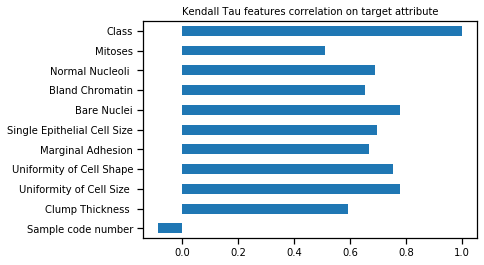

In [62]:
kendall_corr_target = kendall_corr["Class"]
plt.title("Kendall Tau features correlation on target attribute",fontsize=10)
kendall_corr_target.plot(kind='barh', fontsize=10)

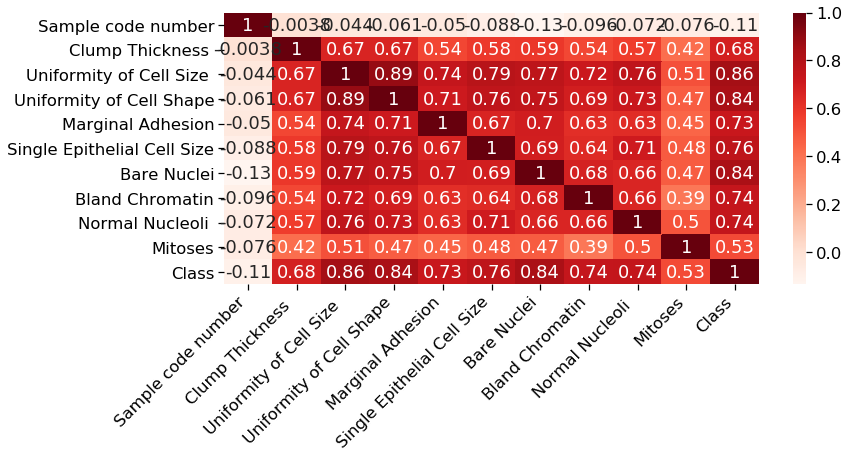

In [55]:
plt.figure(figsize=(12,5))
spearman_corr = cancer_df.corr(method='spearman')
ax = sns.heatmap(spearman_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

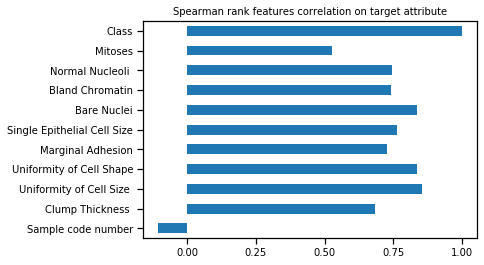

In [64]:
spearman_corr_target = (spearman_corr["Class"])
plt.title("Spearman rank features correlation on target attribute", fontsize=10)
spearman_corr_target.plot(kind='barh',fontsize=10)

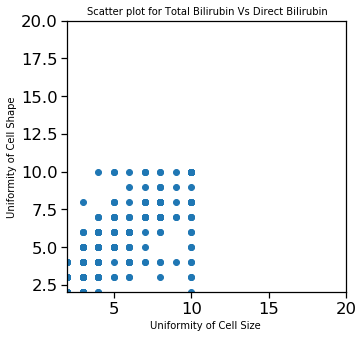

In [66]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(cancer_df['Uniformity of Cell Size '], cancer_df['Uniformity of Cell Shape'])
ax.set_xlabel('Uniformity of Cell Size ',fontsize=10)
ax.set_ylabel('Uniformity of Cell Shape',fontsize=10)
plt.title('Scatter plot for Total Bilirubin Vs Direct Bilirubin',fontsize=10)
plt.xlim([2,20])
plt.ylim([2,20])
plt.show()

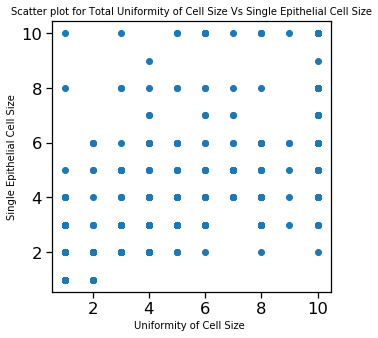

In [68]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(cancer_df['Uniformity of Cell Size '], cancer_df['Single Epithelial Cell Size'])
ax.set_xlabel('Uniformity of Cell Size ',fontsize=10)
ax.set_ylabel('Single Epithelial Cell Size',fontsize=10)
plt.title('Scatter plot for Total Uniformity of Cell Size Vs Single Epithelial Cell Size',fontsize=10)
plt.show()

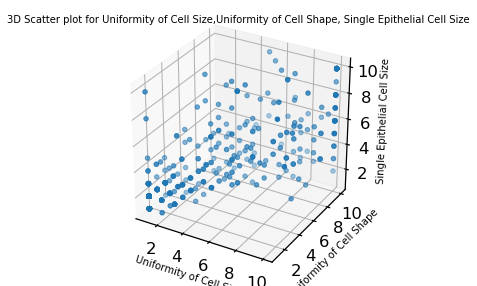

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig_3D = plt.figure(figsize=(5,5))
ax_3D = fig_3D.add_subplot(111, projection = '3d')

x = cancer_df['Uniformity of Cell Size ']
y = cancer_df['Uniformity of Cell Shape']
z = cancer_df['Single Epithelial Cell Size']

ax_3D.scatter(x, y, z)
ax_3D.set_xlabel("Uniformity of Cell Size",fontsize=10)
ax_3D.set_ylabel("Uniformity of Cell Shape",fontsize=10)
ax_3D.set_zlabel("Single Epithelial Cell Size",fontsize=10)

plt.title('3D Scatter plot for Uniformity of Cell Size,Uniformity of Cell Shape, Single Epithelial Cell Size',fontsize=10)
plt.show()

In [16]:
x= cancer_df.drop(['Class','Sample code number'], axis=1)
x
y = cancer_df['Class']
print(x)


     Clump Thickness   Uniformity of Cell Size   Uniformity of Cell Shape  \
0                   5                         4                         4   
1                   3                         1                         1   
2                   6                         8                         8   
3                   4                         1                         1   
4                   8                        10                        10   
..                ...                       ...                       ...   
693                 3                         1                         1   
694                 2                         1                         1   
695                 5                        10                        10   
696                 4                         8                         6   
697                 4                         8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0      

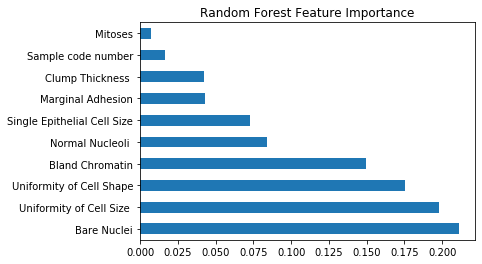

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=(cancer_df.drop('Class', axis=1)).columns)
feat_importances.nlargest(10).plot(kind='barh')
#plt.xlim([0,0.01])
plt.title('Random Forest Feature Importance')
plt.show()

In [41]:
print(model.feature_importances_)

[0.01698148 0.06092537 0.16633019 0.24038301 0.03761782 0.072454
 0.17142208 0.12520339 0.10206081 0.00662185]


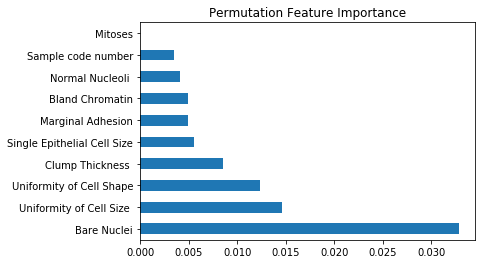

In [20]:
from sklearn.inspection import permutation_importance


# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
# get importance
importance = results.importances_mean

Permutation_feat_importances = pd.Series(importance, index=(cancer_df.drop('Class', axis=1)).columns)
Permutation_feat_importances.nlargest(25).plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.show()

In [21]:
print(Permutation_feat_importances )

Sample code number             0.003519
Clump Thickness                0.008504
Uniformity of Cell Size        0.014663
Uniformity of Cell Shape       0.012317
Marginal Adhesion              0.004985
Single Epithelial Cell Size    0.005572
Bare Nuclei                    0.032845
Bland Chromatin                0.004985
Normal Nucleoli                0.004106
Mitoses                        0.000000
dtype: float64


In [17]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import  geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score 
from sklearn.metrics import recall_score, average_precision_score, auc

In [29]:
def sampling_modeling(sampler, model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    
        #sampler_nearmiss = NearMiss()
        sampled_x, sampled_y = sampler.fit_resample(X_train, y_train)
    #construct_pipeline = make_pipeline(sampler, model)
        model.fit(sampled_x,sampled_y)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}, {1}'.format(sampler, model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [31]:
def modelling_without_sampling(model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}'.format(model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [32]:
def evaluation(pred_values, y_test):
    
    acc = accuracy_score(y_test, pred_values)
    recal = recall_score(y_test, pred_values)
    precis = precision_score(y_test, pred_values)
    #val = f1_score(y_test, pred_values)
    aucroc = roc_auc_score(y_test, pred_values)
    _val = f1_score(y_test, pred_values)
    gmean = geometric_mean_score(y_test, pred_values)
    return acc, recal, precis, aucroc, gmean, _val
    
    
   


# Resampling and Modelling with balanced data

In [30]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.9416058394160584, 0.9635036496350365, 0.9705882352941176, 0.9852941176470589, 0.9779411764705882]
Avg accuracy : 0.967786603692572
Recall : [0.9662921348314607, 0.956989247311828, 0.9651162790697675, 0.9770114942528736, 0.9772727272727273]
Avg recall : 0.9685363765477314
Precision : [0.945054945054945, 0.9888888888888889, 0.9880952380952381, 1.0, 0.9885057471264368]
Avg precision : 0.9821089638331019
F1_score : [0.9555555555555557, 0.9726775956284154, 0.9764705882352942, 0.9883720930232558, 0.9828571428571428]
Avg f-score : 0.9751865950599328
AUC_ROC : [0.9310627340823971, 0.9671309872922776, 0.9725581395348837, 0.9885057471264368, 0.9782196969696969]
Avg AUC_ROC : 0.9674954610011384
Geometric mean : [0.9303959931770183, 0.9670778105670219, 0.9725296671507621, 0.988438917815802, 0.9782192386105881]
Avg gmean : 0.9673323254642385


In [33]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_random = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.9562043795620438, 0.948905109489051, 0.9705882352941176, 0.9926470588235294, 0.9705882352941176]
Avg accuracy : 0.967786603692572
Recall : [0.9662921348314607, 0.9354838709677419, 0.9651162790697675, 0.9885057471264368, 0.9659090909090909]
Avg recall : 0.9642614245808996
Precision : [0.9662921348314607, 0.9886363636363636, 0.9880952380952381, 1.0, 0.9883720930232558]
Avg precision : 0.9862791659172636
F1_score : [0.9662921348314607, 0.9613259668508287, 0.9764705882352942, 0.9942196531791908, 0.9770114942528736]
Avg f-score : 0.9750639674699297
AUC_ROC : [0.9518960674157303, 0.9563782991202346, 0.9725581395348837, 0.9942528735632183, 0.9725378787878787]
Avg AUC_ROC : 0.9695246516843892
Geometric mean : [0.9517872012191037, 0.9561500268787808, 0.9725296671507621, 0.9942362632324556, 0.9725152877196763]
Avg gmean : 0.9694436892401557


In [34]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_smt = SMOTE(random_state=0)
sampling_modeling(sampler_smt, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.9416058394160584, 0.9562043795620438, 0.9705882352941176, 0.9926470588235294, 0.9705882352941176]
Avg accuracy : 0.9663267496779733
Recall : [0.9662921348314607, 0.946236559139785, 0.9767441860465116, 0.9885057471264368, 0.9772727272727273]
Avg recall : 0.9710102708833842
Precision : [0.945054945054945, 0.9887640449438202, 0.9767441860465116, 1.0, 0.9772727272727273]
Avg precision : 0.9775671806636008
F1_score : [0.9555555555555557, 0.967032967032967, 0.9767441860465116, 0.9942196531791908, 0.9772727272727273]
Avg f-score : 0.9741650178173906
AUC_ROC : [0.9310627340823971, 0.9617546432062561, 0.9683720930232558, 0.9942528735632183, 0.9678030303030304]
Avg AUC_ROC : 0.9646490748356316
Geometric mean : [0.9303959931770183, 0.9616294415187687, 0.9683359017431147, 0.9942362632324556, 0.9677566999525399]
Avg gmean : 0.9644708599247794


In [35]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.9562043795620438, 0.9562043795620438, 0.9632352941176471, 0.9926470588235294, 0.9558823529411765]
Avg accuracy : 0.9648346930012881
Recall : [0.9775280898876404, 0.9354838709677419, 0.9767441860465116, 0.9885057471264368, 0.9545454545454546]
Avg recall : 0.9665614697147571
Precision : [0.9560439560439561, 1.0, 0.9655172413793104, 1.0, 0.9767441860465116]
Avg precision : 0.9796610766939556
F1_score : [0.9666666666666667, 0.9666666666666666, 0.9710982658959537, 0.9942196531791908, 0.9655172413793104]
Avg f-score : 0.9728336987575575
AUC_ROC : [0.9470973782771536, 0.967741935483871, 0.9583720930232558, 0.9942528735632183, 0.956439393939394]
Avg AUC_ROC : 0.9647807348573785
Geometric mean : [0.9466083750582059, 0.9672041516493516, 0.9581959793715067, 0.9942362632324556, 0.956437518750037]
Avg gmean : 0.9645364576123114


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_smote = SMOTE(random_state=0)
sampling_modeling(sampler_smote, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.9635036496350365, 0.9781021897810219, 0.9705882352941176, 1.0, 0.9632352941176471]
Avg accuracy : 0.9750858737655645
Recall : [0.9662921348314607, 0.967741935483871, 0.9651162790697675, 1.0, 0.9545454545454546]
Avg recall : 0.9707391607861109
Precision : [0.9772727272727273, 1.0, 0.9880952380952381, 1.0, 0.9882352941176471]
Avg precision : 0.9907206518971226
F1_score : [0.9717514124293786, 0.9836065573770492, 0.9764705882352942, 1.0, 0.9710982658959537]
Avg f-score : 0.9805853647875352
AUC_ROC : [0.962312734082397, 0.9838709677419355, 0.9725581395348837, 1.0, 0.9668560606060606]
Avg AUC_ROC : 0.9771195803930552
Geometric mean : [0.962304506144919, 0.9837387536759294, 0.9725296671507621, 1.0, 0.9667776843251457]
Avg gmean : 0.9770701222593512


In [37]:
model = RandomForestClassifier(random_state=0)
sampler_ADASYN = ADASYN(random_state=0)
sampling_modeling(sampler_ADASYN, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.9708029197080292, 0.9562043795620438, 0.9632352941176471, 0.9926470588235294, 0.9558823529411765]
Avg accuracy : 0.9677544010304852
Recall : [0.9662921348314607, 0.9354838709677419, 0.9651162790697675, 0.9885057471264368, 0.9545454545454546]
Avg recall : 0.9619886973081723
Precision : [0.9885057471264368, 1.0, 0.9764705882352941, 1.0, 0.9767441860465116]
Avg precision : 0.9883441042816485
F1_score : [0.9772727272727273, 0.9666666666666666, 0.9707602339181286, 0.9942196531791908, 0.9655172413793104]
Avg f-score : 0.9748873044832047
AUC_ROC : [0.9727294007490637, 0.967741935483871, 0.9625581395348837, 0.9942528735632183, 0.956439393939394]
Avg AUC_ROC : 0.9707443486540861
Geometric mean : [0.9727081004541591, 0.9672041516493516, 0.9625547402132394, 0.9942362632324556, 0.956437518750037]
Avg gmean : 0.9706281548598487


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), RandomForestClassifier(random_state=0)
Accuracy : [0.948905109489051, 0.9781021897810219, 0.9632352941176471, 0.9926470588235294, 0.9705882352941176]
Avg accuracy : 0.9706955775010734
Recall : [0.9662921348314607, 0.967741935483871, 0.9651162790697675, 0.9885057471264368, 0.9659090909090909]
Avg recall : 0.9707130374841254
Precision : [0.9555555555555556, 1.0, 0.9764705882352941, 1.0, 0.9883720930232558]
Avg precision : 0.9840796473628212
F1_score : [0.9608938547486034, 0.9836065573770492, 0.9707602339181286, 0.9942196531791908, 0.9770114942528736]
Avg f-score : 0.9772983586951691
AUC_ROC : [0.9414794007490638, 0.9838709677419355, 0.9625581395348837, 0.9942528735632183, 0.9725378787878787]
Avg AUC_ROC : 0.9709398520753961
Geometric mean : [0.9411523735624175, 0.9837387536759294, 0.9625547402132394, 0.9942362632324556, 0.9725152877196763]
Avg gmean : 0.9708394836807438


In [39]:
from imblearn.under_sampling import RandomUnderSampler
model = RandomForestClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.9562043795620438, 0.9635036496350365, 0.9705882352941176, 1.0, 0.9632352941176471]
Avg accuracy : 0.9707063117217689
Recall : [0.9662921348314607, 0.946236559139785, 0.9651162790697675, 1.0, 0.9545454545454546]
Avg recall : 0.9664380855172936
Precision : [0.9662921348314607, 1.0, 0.9880952380952381, 1.0, 0.9882352941176471]
Avg precision : 0.9885245334088693
F1_score : [0.9662921348314607, 0.9723756906077349, 0.9764705882352942, 1.0, 0.9710982658959537]
Avg f-score : 0.9772473359140887
AUC_ROC : [0.9518960674157303, 0.9731182795698925, 0.9725581395348837, 1.0, 0.9668560606060606]
Avg AUC_ROC : 0.9728857094253135
Geometric mean : [0.9517872012191037, 0.9727469142278401, 0.9725296671507621, 1.0, 0.9667776843251457]
Avg gmean : 0.9727682933845703


In [40]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.9635036496350365, 0.9635036496350365, 0.9632352941176471, 0.9926470588235294, 0.9705882352941176]
Avg accuracy : 0.9706955775010734
Recall : [0.9775280898876404, 0.946236559139785, 0.9651162790697675, 0.9885057471264368, 0.9659090909090909]
Avg recall : 0.9686591532265441
Precision : [0.9666666666666667, 1.0, 0.9764705882352941, 1.0, 0.9883720930232558]
Avg precision : 0.9863018695850434
F1_score : [0.9720670391061451, 0.9723756906077349, 0.9707602339181286, 0.9942196531791908, 0.9770114942528736]
Avg f-score : 0.9772868222128146
AUC_ROC : [0.9575140449438202, 0.9731182795698925, 0.9625581395348837, 0.9942528735632183, 0.9725378787878787]
Avg AUC_ROC : 0.9719962432799388
Geometric mean : [0.9573048544061933, 0.9727469142278401, 0.9625547402132394, 0.9942362632324556, 0.9725152877196763]
Avg gmean : 0.9718716119598809


In [41]:
model = AdaBoostClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), AdaBoostClassifier(random_state=0)
Accuracy : [0.9416058394160584, 0.9708029197080292, 0.9338235294117647, 1.0, 0.9558823529411765]
Avg accuracy : 0.9604229282954059
Recall : [0.9550561797752809, 0.956989247311828, 0.9651162790697675, 1.0, 0.9545454545454546]
Avg recall : 0.9663414321404662
Precision : [0.9550561797752809, 1.0, 0.9325842696629213, 1.0, 0.9767441860465116]
Avg precision : 0.9728769270969426
F1_score : [0.9550561797752809, 0.978021978021978, 0.9485714285714285, 1.0, 0.9655172413793104]
Avg f-score : 0.9694333655495996
AUC_ROC : [0.9358614232209737, 0.978494623655914, 0.9225581395348836, 1.0, 0.956439393939394]
Avg AUC_ROC : 0.9586707160702332
Geometric mean : [0.9356645578379078, 0.9782582722940951, 0.9215760009795152, 1.0, 0.956437518750037]
Avg gmean : 0.958387269972311


In [42]:
model = AdaBoostClassifier(random_state=0)
sampler_smt1 = SMOTE(random_state=0)
sampling_modeling(sampler_smt1, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.948905109489051, 0.9708029197080292, 0.9632352941176471, 0.9926470588235294, 0.9338235294117647]
Avg accuracy : 0.9618827823100042
Recall : [0.9662921348314607, 0.967741935483871, 0.9767441860465116, 0.9885057471264368, 0.9545454545454546]
Avg recall : 0.970765891606747
Precision : [0.9555555555555556, 0.989010989010989, 0.9655172413793104, 1.0, 0.9438202247191011]
Avg precision : 0.9707808021329912
F1_score : [0.9608938547486034, 0.9782608695652174, 0.9710982658959537, 0.9942196531791908, 0.9491525423728814]
Avg f-score : 0.9707250371523694
AUC_ROC : [0.9414794007490638, 0.9725073313782991, 0.9583720930232558, 0.9942528735632183, 0.9251893939393939]
Avg AUC_ROC : 0.9583602185306461
Geometric mean : [0.9411523735624175, 0.9724956558188372, 0.9581959793715067, 0.9942362632324556, 0.9247235459117695]
Avg gmean : 0.9581607635793974


In [43]:
model = AdaBoostClassifier(random_state=0)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.948905109489051, 0.9416058394160584, 0.9411764705882353, 0.9926470588235294, 0.9632352941176471]
Avg accuracy : 0.9575139544869042
Recall : [0.9662921348314607, 0.9354838709677419, 0.9767441860465116, 0.9885057471264368, 0.9659090909090909]
Avg recall : 0.9665870059762485
Precision : [0.9555555555555556, 0.9775280898876404, 0.9333333333333333, 1.0, 0.9770114942528736]
Avg precision : 0.9686856946058805
F1_score : [0.9608938547486034, 0.956043956043956, 0.9545454545454545, 0.9942196531791908, 0.9714285714285714]
Avg f-score : 0.9674262979891551
AUC_ROC : [0.9414794007490638, 0.9450146627565983, 0.9283720930232557, 0.9942528735632183, 0.9621212121212122]
Avg AUC_ROC : 0.9542480484426695
Geometric mean : [0.9411523735624175, 0.9449666009086483, 0.9271110417425359, 0.9942362632324556, 0.9621137556380113]
Avg gmean : 0.9539160070168137


# Modelling with Imbalanced data

In [44]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.948905109489051, 0.9562043795620438, 0.9705882352941176, 0.9926470588235294, 0.9705882352941176]
Avg accuracy : 0.967786603692572
Recall : [0.9775280898876404, 0.946236559139785, 0.9767441860465116, 0.9885057471264368, 0.9772727272727273]
Avg recall : 0.9732574618946203
Precision : [0.9456521739130435, 0.9887640449438202, 0.9767441860465116, 1.0, 0.9772727272727273]
Avg precision : 0.9776866264352206
F1_score : [0.9613259668508287, 0.967032967032967, 0.9767441860465116, 0.9942196531791908, 0.9772727272727273]
Avg f-score : 0.9753191000764451
AUC_ROC : [0.9366807116104869, 0.9617546432062561, 0.9683720930232558, 0.9942528735632183, 0.9678030303030304]
Avg AUC_ROC : 0.9657726703412495
Geometric mean : [0.9357896383221024, 0.9616294415187687, 0.9683359017431147, 0.9942362632324556, 0.9677566999525399]
Avg gmean : 0.9655495889537962


In [45]:
model = AdaBoostClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of AdaBoostClassifier(random_state=0)
Accuracy : [0.9562043795620438, 0.9562043795620438, 0.9411764705882353, 0.9926470588235294, 0.9558823529411765]
Avg accuracy : 0.9604229282954057
Recall : [0.9775280898876404, 0.967741935483871, 0.9767441860465116, 1.0, 0.9659090909090909]
Avg recall : 0.9775846604654228
Precision : [0.9560439560439561, 0.967741935483871, 0.9333333333333333, 0.9886363636363636, 0.9659090909090909]
Avg precision : 0.9623329358813232
F1_score : [0.9666666666666667, 0.967741935483871, 0.9545454545454545, 0.9942857142857142, 0.9659090909090909]
Avg f-score : 0.9698297723781595
AUC_ROC : [0.9470973782771536, 0.9497800586510264, 0.9283720930232557, 0.9897959183673469, 0.9517045454545454]
Avg AUC_ROC : 0.9533499987546656
Geometric mean : [0.9466083750582059, 0.949610199393303, 0.9271110417425359, 0.989743318610787, 0.9515985354797856]
Avg gmean : 0.9529342940569234


In [46]:
model = RandomForestClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of RandomForestClassifier(random_state=0)
Accuracy : [0.948905109489051, 0.9781021897810219, 0.9705882352941176, 1.0, 0.9705882352941176]
Avg accuracy : 0.9736367539716616
Recall : [0.9662921348314607, 0.967741935483871, 0.9651162790697675, 1.0, 0.9659090909090909]
Avg recall : 0.973011888058838
Precision : [0.9555555555555556, 1.0, 0.9880952380952381, 1.0, 0.9883720930232558]
Avg precision : 0.9864045773348099
F1_score : [0.9608938547486034, 0.9836065573770492, 0.9764705882352942, 1.0, 0.9770114942528736]
Avg f-score : 0.979596498922764
AUC_ROC : [0.9414794007490638, 0.9838709677419355, 0.9725581395348837, 1.0, 0.9725378787878787]
Avg AUC_ROC : 0.9740892773627523
Geometric mean : [0.9411523735624175, 0.9837387536759294, 0.9725296671507621, 1.0, 0.9725152877196763]
Avg gmean : 0.9739872164217571
